# 강의내용

* 교재 7장 HFDP Ch7
* Adapter, Facade (Behavioral Design Pattern)
* 프로그래밍 'Turkey Adapter', 'Home Theater Facade'
* TOC
    * intro
    * problems
    * before
    * design
    * after
    * case implementation
    * exercise (by Sat to git: 50% for 1 day late deadline) 
        * case extension
            * Enumerator Adapter
        * new case -  Smart Home (beginStudy, endStudy)

# 1. Adapter 패턴

* Object wrapping. 서로 다른 인터페이스를 일치시킴.
    * "a bridge between two incompatible interfaces"
    * p.243 서로 다른 인터페이스를 동일하게 변환
    incompatible interface -> "converts the interface of a class into another interface that clients expect."
    * 전기 플러그 (p.236)
        * 서로 다른 플러그 (유럽, 미국)의 경우, adapter를 사용.
    * command pattern과 비교 - behavioral pattern
        * legacy code를 변경하지 않고 그대로 사용할 경우

* cases
    * HFDP Duck, Turkey
    * enumerators (p.248) vs iterators
        * enumerators
            * hasMoreElements()
            * nextElement()
        * iterators (p.248)
            * hasNext()
            * next()
            * remove()
    * Patterns in java
        * Arrays asList
        * 자바 KeyAdapter, MouseAdpater는 GoF Adapter패턴을 사용하지 않는다.

* 디자인패턴 요소

요소 | 설명
---|---
name | Adapter
problem | 사용객체의 API가 서로 다름.
solution | 함수를 변환하는 객체를 중간에 넣음.
consequence | 변경 최소화.

## Facade 패턴

* 복잡한 시스템의 관문 "a unified interface to a set of interface in a subsystem" (p.264)
* Adapter패턴과 유사하지만, 다형성을 사용하지 않음.
* case
    * use case controller
    * 메뉴 - 여러 기능을 호출
    * home theater

패턴 | 차이
---|---
Adapter | 서로 다른 인터페이스 일치, **다형적**polymorphic 호출 가능.
Facade | 단순한 인터페이스 제공, 다형적 호출 사용하지 않음.


# 2. 문제

* 사용하려는 객체의 API가 서로 다름.
* Adapter는 다형성을 사용하기 위해 인터페이스를 동일하게, Facade는 복잡한 인터페이스를 단순하게.

In [1]:
import os
import glob

mywd=%pwd
myplantdir=os.path.join(mywd,'lib')
mydotdir=!which dot
mydot=mydotdir[0]
# mydot="C:\\Program Files (x86)\\Graphviz2.38\\bin\\dot.exe"

# plantuml.jar파일이 존재하는지 확인한후, 테스트
%cd {myplantdir}
glob.glob(r'./*.jar')
# dot 실행파일이 저장된 곳을 인식 못하는 경우, Python명령어를 이용해 환경변수를 설정할 수 있다.
os.environ['GRAPHVIZ_DOT']=mydot
# 리눅스 예: 앞 느낌표는 쉘 명령어. {myplantdir}는 쉘에서 변수값을 읽어오는 것.
!java -jar {myplantdir}/plantuml.jar -testdot

/Users/media/Code/git/sd/lib
The environment variable GRAPHVIZ_DOT has been set to /opt/local/bin/dot
Dot executable is /opt/local/bin/dot
Dot version: dot - graphviz version 2.38.0 (20140413.2041)
Installation seems OK. File generation OK


In [2]:
%install_ext https://raw.githubusercontent.com/sberke/ipython-plantuml/master/plantuml_magics.py

Installed plantuml_magics.py. To use it, type:
  %load_ext plantuml_magics


In [3]:
%load_ext plantuml_magics

# 3. before

## 3.1 Adapter

* Duck과 Turkey의 인터페이스가 서로 다름.
* 사용객체, API가 서로 다름
    * Duck - quack()
    * Turkey - gobble()

## 3.2 Facade

* 스마트 홈 가전제품, 여러 기기의 인터페이스가 달라 통제하기 어려움.

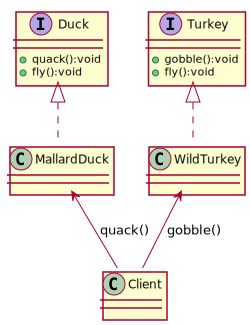

In [11]:
%%plantuml
@startuml
interface Duck {
    +quack():void
    +fly():void
}
interface Turkey {
    +gobble():void
    +fly():void
}
Duck <|.. MallardDuck
Turkey <|.. WildTurkey
Client -up-> MallardDuck:quack()
Client -up-> WildTurkey:gobble()
@enduml

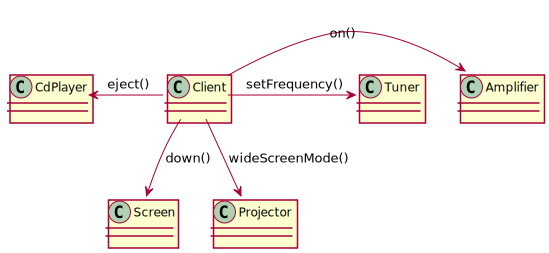

In [11]:
%%plantuml
@startuml
class Amplifier
Client -right-> Amplifier:on()
Client -left-> CdPlayer:eject()
Client -down-> Screen:down()
Client -down-> Projector:wideScreenMode()
Client -> Tuner:setFrequency()
@enduml

# 4. 설계

* Adapter
    * Target과 Adaptee의 인터페이스를 변환함.
    * Client는 Target을 사용하는 것과 동일한 사용방법. 실제는 Adaptee가 호출됨.
    * 대안 p.248
        * 다중상속 을 이용 -> Class Adapter
        * 상속 대신 연관을 이용 -> 인터페이스를 구현한 Object Adpater
* Facade
    * Principle of Least Knowldge
    * 잘 모르는 친구와 가까이 지내지 않아 -> 여러 클래스를 사용하지 않음 (의존성을 적게)
    * Facade를 통하지 않으면 복잡한 시스템 안의 클래스를 개별적으로 사용.

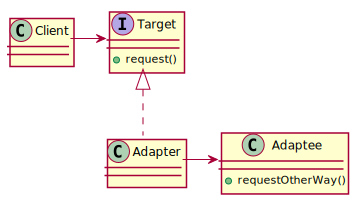

In [15]:
%%plantuml
@startuml
class Client
interface Target {
    +request()
}
class Adapter
class Adaptee {
    +requestOtherWay()
}
Client -> Target
Target <|.. Adapter
Adapter -right-> Adaptee
@enduml

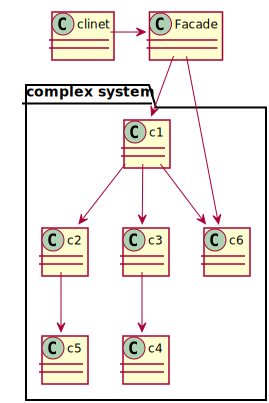

In [12]:
%%plantuml
@startuml
package "complex system" {
  class c1
  class c2
  class c3
  class c4
  class c5
  class c6
  c1 --> c2
  c1 --> c6
  c2 -down-> c5
  c1 --> c3
  c3 --> c4
}
clinet -right-> Facade
Facade -> c1
Facade -> c6
@enduml

# 5. after

* 교재 HFDP Ch6 'Remote Controller'

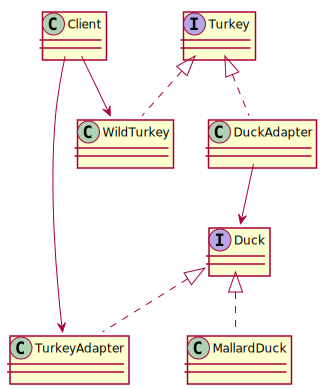

In [45]:
%%plantuml
@startuml
class Client
Interface Duck
Interface Turkey
class DuckAdapter
class MallardDuck
Turkey <|.. DuckAdapter
Turkey <|.. WildTurkey
DuckAdapter --> Duck
Duck <|.. MallardDuck
Duck <|.. TurkeyAdapter
Client --> WildTurkey
Client --> TurkeyAdapter
@enduml

# 6. Case Implementation


* simple Duck, Tuckey
* Enumeration, Iterator
* home theater


## 6.1. Duck

* 단순 Duck, Turkey 사례

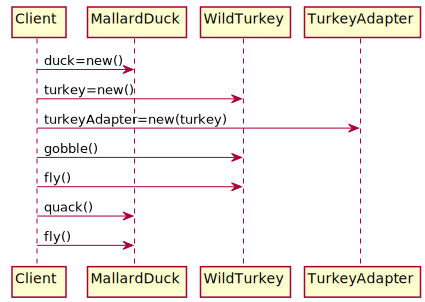

In [47]:
%%plantuml
@startuml
Client -> MallardDuck:duck=new()
Client -> WildTurkey:turkey=new()
Client -> TurkeyAdapter:turkeyAdapter=new(turkey)
Client -> WildTurkey:gobble()
Client -> WildTurkey:fly()
Client -> MallardDuck:quack()
Client -> MallardDuck:fly()
@enduml

In [ ]:
# %load ./src/headfirst/adapter/ducks/Duck.java
package headfirst.adapter.ducks;

public interface Duck {
	public void quack();
	public void fly();
}


In [ ]:
# %load ./src/headfirst/adapter/ducks/DuckAdapter.java
package headfirst.adapter.ducks;
import java.util.Random;

public class DuckAdapter implements Turkey {
	Duck duck;
	Random rand;
 
	public DuckAdapter(Duck duck) {
		this.duck = duck;
		rand = new Random();
	}
    
	public void gobble() {
		duck.quack();
	}
  
	public void fly() {
		if (rand.nextInt(5)  == 0) {
		     duck.fly();
		}
	}
}


In [ ]:
# %load ./src/headfirst/adapter/ducks/MallardDuck.java
package headfirst.adapter.ducks;

public class MallardDuck implements Duck {
	public void quack() {
		System.out.println("Quack");
	}
 
	public void fly() {
		System.out.println("I'm flying");
	}
}


In [ ]:
# %load ./src/headfirst/adapter/ducks/Turkey.java
package headfirst.adapter.ducks;

public interface Turkey {
	public void gobble();
	public void fly();
}


In [ ]:
# %load ./src/headfirst/adapter/ducks/TurkeyAdapter.java
package headfirst.adapter.ducks;

public class TurkeyAdapter implements Duck {
	Turkey turkey;
 
	public TurkeyAdapter(Turkey turkey) {
		this.turkey = turkey;
	}
    
	public void quack() {
		turkey.gobble();
	}
  
	public void fly() {
		for(int i=0; i < 5; i++) {
			turkey.fly();
		}
	}
}


In [ ]:
# %load ./src/headfirst/adapter/ducks/WildTurkey.java
package headfirst.adapter.ducks;

public class WildTurkey implements Turkey {
	public void gobble() {
		System.out.println("Gobble gobble");
	}
 
	public void fly() {
		System.out.println("I'm flying a short distance");
	}
}


In [ ]:
# %load ./src/headfirst/adapter/ducks/DuckTestDrive.java
package headfirst.adapter.ducks;

public class DuckTestDrive {
	public static void main(String[] args) {
		MallardDuck duck = new MallardDuck();
 
		WildTurkey turkey = new WildTurkey();
		Duck turkeyAdapter = new TurkeyAdapter(turkey);
   
		System.out.println("The Turkey says...");
		turkey.gobble();
		turkey.fly();
 
		System.out.println("\nThe Duck says...");
		testDuck(duck);
  
		System.out.println("\nThe TurkeyAdapter says...");
		testDuck(turkeyAdapter);
	}
 
	static void testDuck(Duck duck) {
		duck.quack();
		duck.fly();
	}
}


In [ ]:
# %load ./src/headfirst/adapter/ducks/TurkeyTestDrive.java
package headfirst.adapter.ducks;

public class TurkeyTestDrive {
	public static void main(String[] args) {
		MallardDuck duck = new MallardDuck();
		Turkey duckAdapter = new DuckAdapter(duck);
 
		for(int i=0;i<10;i++) {
			System.out.println("The DuckAdapter says...");
			duckAdapter.gobble();
			duckAdapter.fly();
		}
	}
}


In [55]:
!javac -d classes/ -sourcepath src/ src/headfirst/adapter/ducks/*.java
!java -cp classes/ headfirst.adapter.ducks.TurkeyTestDrive
!java -cp classes/ headfirst.adapter.ducks.DuckTestDrive

The DuckAdapter says...
Quack
The DuckAdapter says...
Quack
The DuckAdapter says...
Quack
The DuckAdapter says...
Quack
I'm flying
The DuckAdapter says...
Quack
The DuckAdapter says...
Quack
I'm flying
The DuckAdapter says...
Quack
The DuckAdapter says...
Quack
The DuckAdapter says...
Quack
The DuckAdapter says...
Quack
The Turkey says...
Gobble gobble
I'm flying a short distance

The Duck says...
Quack
I'm flying

The TurkeyAdapter says...
Gobble gobble
I'm flying a short distance
I'm flying a short distance
I'm flying a short distance
I'm flying a short distance
I'm flying a short distance


## 6.2 Enumeration, Iterator

* p.248 ~
* Enumeration의 Iterator Adapter
* Iterator의 Enumeration Adapter

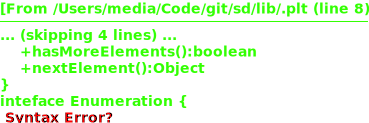

In [4]:
%%plantuml
@startuml
class IteratorEnumeration {
    iterator:Iterator
    +IteratorEnumeration(Iterator)
    +hasMoreElements():boolean
    +nextElement():Object
}
inteface Enumeration {
    +hasMoreElements():boolean
    +nextElement():Enumeration
}
Enumeration <|.. IteratorEnumeration
@enduml

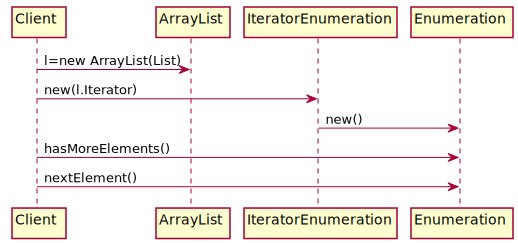

In [44]:
%%plantuml
@startuml
Client -> ArrayList:l=new ArrayList(List)
Client -> IteratorEnumeration:new(l.Iterator)
IteratorEnumeration -> Enumeration:new()
Client -> Enumeration:hasMoreElements()
Client -> Enumeration:nextElement()
@enduml

In [ ]:
# %load ./src/headfirst/adapter/iterenum/IteratorEnumeration.java
package headfirst.adapter.iterenum;

import java.util.*;
public class IteratorEnumeration implements Enumeration {
	Iterator iterator;
	public IteratorEnumeration(Iterator iterator) {
		this.iterator = iterator;
	}
	public boolean hasMoreElements() {
		return iterator.hasNext();
	}
	public Object nextElement() {
		return iterator.next();
	}
}


In [ ]:
# %load ./src/headfirst/adapter/iterenum/IteratorEnumerationTestDrive.java
package headfirst.adapter.iterenum;

import java.util.*;

public class IteratorEnumerationTestDrive {
	public static void main (String args[]) {
		ArrayList l = new ArrayList(Arrays.asList(args));
		Enumeration enumeration = new IteratorEnumeration(l.iterator());
		while (enumeration.hasMoreElements()) {
			System.out.println(enumeration.nextElement());
		}
	}
}


In [41]:
!javac -d classes/ -sourcepath src/ src/headfirst/adapter/iterenum/*.java
!java -cp classes/ headfirst.adapter.iterenum.IteratorEnumerationTestDrive abc def

Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
abc
def


## 6.3 Arrays adapter

* Arrays의 리스트 변환 Adapter
* asList() 함수를 이용하여, Arrays를 고정크기의 List로 변환.
* 변환된 List는 ArraysAdapter로서 Arrays의 특징을 가지게 된다.
    * List로 변환하더라도, 고정크기이므로 add, remove는 사용할 수 없다.
    * 그러나 List로 변환하고, List의 set()함수를 이용하여, 데이터를 변경할 수 있다 (단, 원래 Arrays도 변경된다)

```
> import java.util.Arrays
> String[] cities = {"seoul","incheon","busan","sejong"}
> import java.util.List
> List cityList=Arrays.asList(cities)
> cityList.size()
4
> cities.length
4
> cityList.set(0,"suwon")
"seoul"
> cityList
[suwon, incheon, busan, sejong]
> cities
{ suwon, incheon, busan, sejong }
```

* 데이터를 추가할 수 있도록, Arrays를 ArrayList로 변환할 수 있다.
    ```
    Arraylist cityArrayList = new Arraylist();
    cityArrayList.addAll(Arrays.asList(cities));
    ```

```
> import java.util.ArrayList;
> ArrayList cityArrayList = new ArrayList();
> cityArrayList.addAll(Arrays.asList(cities));
> cities
{ suwon, incheon, busan, sejong }
> cityArrayList.add("jeju")
true
> cityArrayList
[suwon, incheon, busan, sejong, jeju]
```

## 6.4 HomeThreater

* Facade Pattern (p.254 ~ )
* 많은 기기를 중앙 통제 (모든 기기의 사용법을 알 필요 없슴 Least Knowledge)

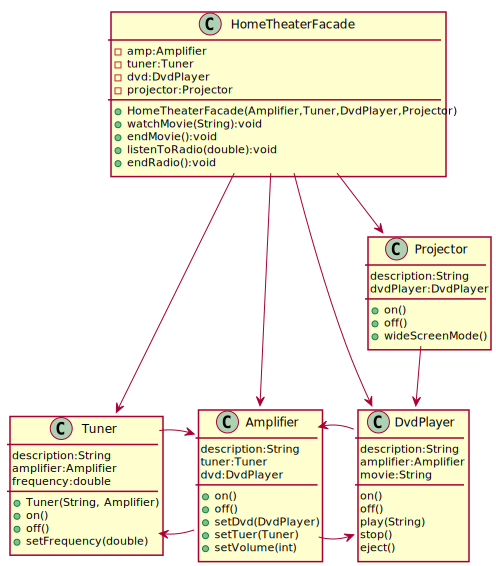

In [28]:
%%plantuml
@startuml
class HomeTheaterFacade {
    -amp:Amplifier
    -tuner:Tuner
    -dvd:DvdPlayer
    -projector:Projector
    +HomeTheaterFacade(Amplifier,Tuner,DvdPlayer,Projector)
    +watchMovie(String):void
    +endMovie():void
    +listenToRadio(double):void
    +endRadio():void
}
HomeTheaterFacade --> Amplifier
HomeTheaterFacade --> Tuner
HomeTheaterFacade --> DvdPlayer
HomeTheaterFacade --> Projector
Amplifier -left-> Tuner
Amplifier -right-> DvdPlayer
Tuner --> Amplifier
DvdPlayer --> Amplifier
Projector --> DvdPlayer
class Amplifier {
    description:String
    tuner:Tuner
    dvd:DvdPlayer
    +on()
    +off()
    +setDvd(DvdPlayer)
    +setTuer(Tuner)
    +setVolume(int)
}
class Tuner {
    description:String
    amplifier:Amplifier
    frequency:double
    +Tuner(String, Amplifier)
    +on()
    +off()
    +setFrequency(double)
}
class DvdPlayer {
    description:String
    amplifier:Amplifier
    movie:String
    on()
    off()
    play(String)
    stop()
    eject()
}
class Projector {
    description:String
    dvdPlayer:DvdPlayer
    +on()
    +off()
    +wideScreenMode()
}
@enduml

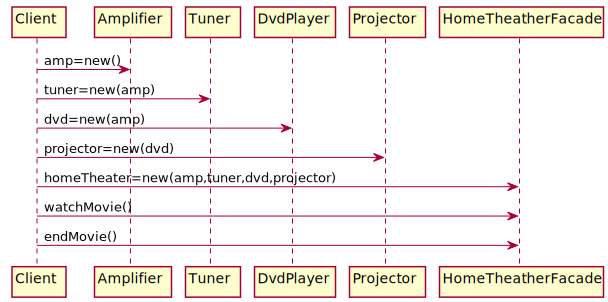

In [23]:
%%plantuml
@startuml
Client -> Amplifier:amp=new()
Client -> Tuner:tuner=new(amp)
Client -> DvdPlayer:dvd=new(amp)
Client -> Projector:projector=new(dvd)
Client -> HomeTheatherFacade:homeTheater=new(amp,tuner,dvd,projector)
Client -> HomeTheatherFacade:watchMovie()
Client -> HomeTheatherFacade:endMovie()
@enduml

In [ ]:
# %load ./src/headfirst/facade/hometheater/simple/Amplifier.java
package headfirst.facade.hometheater.simple;

public class Amplifier {
    String description;
    Tuner tuner;
    DvdPlayer dvd;
    public Amplifier(String description) {
        this.description = description;
    }
    public void on() {
        System.out.println(description + " on");
    }
    public void off() {
        System.out.println(description + " off");
    }
    public void setDvd(DvdPlayer dvd) {
        System.out.println(description + " setting DVD player to " + dvd);
        this.dvd = dvd;
    }
    public void setTuner(Tuner tuner) {
        System.out.println(description + " setting tuner to " + dvd);
        this.tuner = tuner;
    }
    public void setVolume(int level) {
        System.out.println(description + " setting volume to " + level);
    }
    public String toString() {
        return description;
    }
}


In [ ]:
# %load ./src/headfirst/facade/hometheater/simple/DvdPlayer.java
package headfirst.facade.hometheater.simple;

public class DvdPlayer {
    String description;
    Amplifier amplifier;
    String movie;
	
    public DvdPlayer(String description, Amplifier amplifier) {
        this.description = description;
        this.amplifier = amplifier;
    }
    public void on() {
        System.out.println(description + " on");
    }
    public void off() {
        System.out.println(description + " off");
    }
    public void eject() {
        movie = null;
        System.out.println(description + " eject");
    }
    public void play(String movie) {
        this.movie = movie;
        System.out.println(description + " playing \"" + movie + "\"");
    }
    public void stop() {
        System.out.println(description + " stopped \"" + movie + "\"");
    }
    public String toString() {
        return description;
    }
}


In [ ]:
# %load ./src/headfirst/facade/hometheater/simple/Projector.java
package headfirst.facade.hometheater.simple;

public class Projector {
    String description;
    DvdPlayer dvdPlayer;
    public Projector(String description, DvdPlayer dvdPlayer) {
        this.description = description;
        this.dvdPlayer = dvdPlayer;
    }
    public void on() {
        System.out.println(description + " on");
    }
    public void off() {
        System.out.println(description + " off");
    }
    public void wideScreenMode() {
        System.out.println(description + " in widescreen mode (16x9 aspect ratio)");
    }
    public String toString() {
        return description;
    }
}


In [ ]:
# %load ./src/headfirst/facade/hometheater/simple/Tuner.java
package headfirst.facade.hometheater.simple;

public class Tuner {
    String description;
    Amplifier amplifier;
    double frequency;
	
    public Tuner(String description, Amplifier amplifier) {
        this.description = description;
    }
    public void on() {
        System.out.println(description + " on");
    }
    public void off() {
        System.out.println(description + " off");
    }
    public void setFrequency(double frequency) {
        System.out.println(description + " setting frequency to " + frequency);
        this.frequency = frequency;
    }
    public String toString() {
        return description;
    }
}


In [ ]:
# %load ./src/headfirst/facade/hometheater/simple/HomeTheaterFacade.java
package headfirst.facade.hometheater.simple;

public class HomeTheaterFacade {
    private Amplifier amp;
    private Tuner tuner;
    private DvdPlayer dvd;
    private Projector projector;
 
    public HomeTheaterFacade(Amplifier amp, Tuner tuner, DvdPlayer dvd, Projector projector) {
        this.amp = amp;
        this.tuner = tuner;
        this.dvd = dvd;
        this.projector = projector;
    }
 
    public void watchMovie(String movie) {
        System.out.println("Get ready to watch a movie...");
        projector.on();
        projector.wideScreenMode();
        amp.on();
        amp.setDvd(dvd);
        amp.setVolume(5);
        dvd.on();
        dvd.play(movie);
    }
    public void endMovie() {
        System.out.println("Shutting movie theater down...");
        projector.off();
        amp.off();
        dvd.stop();
        dvd.eject();
        dvd.off();
    }
    public void listenToRadio(double frequency) {
        System.out.println("Tuning in the airwaves...");
        tuner.on();
        tuner.setFrequency(frequency);
        amp.on();
        amp.setVolume(5);
        amp.setTuner(tuner);
    }
    public void endRadio() {
        System.out.println("Shutting down the tuner...");
        tuner.off();
        amp.off();
    }
}


In [ ]:
# %load ./src/headfirst/facade/hometheater/simple/HomeTheaterTestDrive.java
/*
 * @author simple
 * @version 20151108
 * simple version: amp, tuner, dvd, project only
 */
package headfirst.facade.hometheater.simple;

public class HomeTheaterTestDrive {
    public static void main(String[] args) {
        Amplifier amp = new Amplifier("My Amplifier");
        Tuner tuner = new Tuner("My AM/FM Tuner", amp);
        DvdPlayer dvd = new DvdPlayer("My DVD Player", amp);
        Projector projector = new Projector("My Projector", dvd);
 
        HomeTheaterFacade homeTheater = new HomeTheaterFacade(amp, tuner, dvd, projector);
        homeTheater.watchMovie("My Movie Watching...");
        homeTheater.endMovie();
    }
}


In [29]:
!javac -d classes/ -sourcepath src/ src/headfirst/facade/hometheater/simple/*.java
!java -cp classes/ headfirst.facade.hometheater.simple.HomeTheaterTestDrive

Get ready to watch a movie...
My Projector on
My Projector in widescreen mode (16x9 aspect ratio)
My Amplifier on
My Amplifier setting DVD player to My DVD Player
My Amplifier setting volume to 5
My DVD Player on
My DVD Player playing "My Movie Watching..."
Shutting movie theater down...
My Projector off
My Amplifier off
My DVD Player stopped "My Movie Watching..."
My DVD Player eject
My DVD Player off
